$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [ ]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [ ]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [ ]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [ ]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [ ]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [ ]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

**Q 2** \\
minimizer is $(x_1,x_2)=(-100,25)$ \\
and minimum function value is 0.

We can find this with basic calculus and the optimizer in above code also seems to be converging to theoritical optimizer.

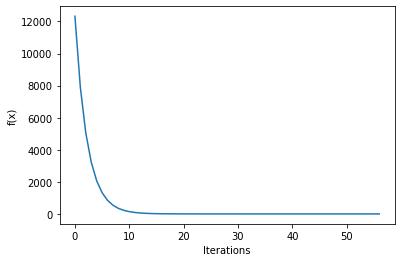

In [ ]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

**Q 3**

In [ ]:
def find_minimizer2(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  #fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    #fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, evalf(x), k  #in this modified fn we are also returning no. of iterations taken

In [ ]:
final_minimizers={}
final_obj_values={}
num_of_iter={}

for p in range(10):
  final_minimizers[p+1],final_obj_values[p+1],num_of_iter[p+1]=find_minimizer2(np.array([10,10]), 10**(-(p+1)), 0.1)

In [ ]:
final_minimizers

{1: array([-99.9553787 ,  24.99391528]),
 2: array([-99.99520882,  24.99934666]),
 3: array([-99.99958844,  24.99994388]),
 4: array([-99.99995581,  24.99999397]),
 5: array([-99.99999526,  24.99999935]),
 6: array([-99.99999959,  24.99999994]),
 7: array([-99.99999996,  24.99999999]),
 8: array([-100.,   25.]),
 9: array([-100.,   25.]),
 10: array([-100.,   25.])}

In [ ]:
final_obj_values

{1: 0.0020280843668995063,
 2: 2.3382220797474075e-05,
 3: 1.7253033717248775e-07,
 4: 1.989139359193299e-09,
 5: 2.293321544605827e-11,
 6: 1.6921726745458407e-13,
 7: 1.950942200128245e-15,
 8: 2.249273021138356e-17,
 9: 1.6597088735501767e-19,
 10: 1.9135732950098918e-21}

In [ ]:
num_of_iter

{1: 35, 2: 45, 3: 56, 4: 66, 5: 76, 6: 87, 7: 97, 8: 107, 9: 118, 10: 128}

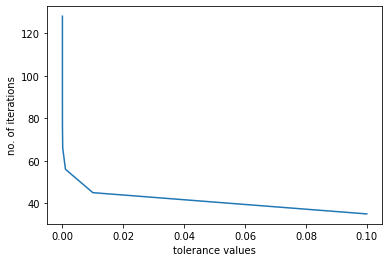

In [ ]:
import matplotlib.pyplot as plt

#making a list for tolerance values
tol_values=[]
for i in range(10):
  tol_values.append(10**(-(i+1)))

#list for number of iterations for respective
#tolerance values in tol_values list
iters=[num_of_iter[i+1] for i in range(10)]

plt.plot(tol_values, iters)
# naming the x axis
plt.xlabel('tolerance values')
# naming the y axis
plt.ylabel('no. of iterations')
plt.show()

From the above plot we can easily conclude that as the tolerance value decreases the no. of iterations increases.

Decreasing the tolerance value the minimizer are getting more accurate and converging to integer and same is with the objective function values also.

**Q 4**

In [ ]:
step_len_values=[0.0001,0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]

final_minimizers_2={}
final_obj_values_2={}
num_of_iter_2={}

for i in step_len_values:
  final_minimizers_2[i],final_obj_values_2[i],num_of_iter_2[i]=find_minimizer2(np.array([10,10]), 10**(-5), i)

In [ ]:
final_minimizers_2

{0.0001: array([-99.99999505,  24.99999932]),
 0.001: array([-99.99999505,  24.99999933]),
 0.01: array([-99.99999512,  24.99999933]),
 0.1: array([-99.99999526,  24.99999935]),
 0.2: array([-99.99999685,  24.99999957]),
 0.4: array([-99.99999775,  24.99999969]),
 0.5: array([-100.,   25.]),
 0.6: array([-100.00000225,   25.00000031]),
 0.7: array([-100.00000302,   25.00000041]),
 0.8: array([-99.99999685,  24.99999957]),
 0.9: array([-99.99999526,  24.99999935])}

In [ ]:
final_obj_values_2

{0.0001: 2.49936770204995e-11,
 0.001: 2.494219709847674e-11,
 0.01: 2.4304673044883465e-11,
 0.1: 2.293321544605827e-11,
 0.2: 1.011747066175869e-11,
 0.4: 5.169479687800271e-12,
 0.5: 0.0,
 0.6: 5.169479687800271e-12,
 0.7: 9.312506683476372e-12,
 0.8: 1.011747066175869e-11,
 0.9: 2.293321544605827e-11}

In [ ]:
num_of_iter_2

{0.0001: 84571,
 0.001: 8450,
 0.01: 838,
 0.1: 76,
 0.2: 34,
 0.4: 11,
 0.5: 1,
 0.6: 11,
 0.7: 19,
 0.8: 34,
 0.9: 76}

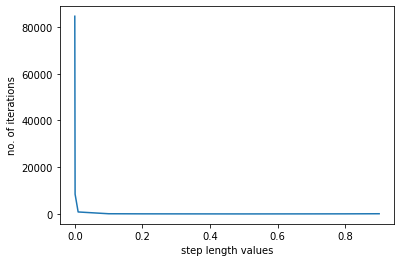

In [ ]:
#list for number of iterations for respective
#step length values in step_len_values list
iters_2=[num_of_iter_2[i] for i in step_len_values]

plt.plot(step_len_values, iters_2)
# naming the x axis
plt.xlabel('step length values')
# naming the y axis
plt.ylabel('no. of iterations')
plt.show()

From the plot we can say that the no. of iterations are very huge for step length values less than 0.01. Which increses the calculation time. So, it is not good to take step length values lesser than 0.01, we can say that the ideal step length value is 0.5 . 

We are getting almost same minimizers and objective function values for all step length values because the termination of algorithm depends only upon the tolerance value, which is same for all step length values. With exception in case of step length value=0.5 because in this case the algorithm terminates only after single iteration.

**Q 5**

In [ ]:
start_points=[(10000,10000),(500,0),(0,1000),(1,1),(-500,-2)]

In [ ]:
final_minimizers_3={}
final_obj_values_3={}
num_of_iter_3={}

for i in start_points:
  final_minimizers_3[i],final_obj_values_3[i],num_of_iter_3[i]=find_minimizer2(np.array(list(i)), 10**(-5), 0.1)

In [ ]:
final_minimizers_3

{(-500, -2): array([-100.00000452,   24.99999969]),
 (0, 1000): array([-99.99999954,  25.00000452]),
 (1, 1): array([-99.99999564,  24.99999896]),
 (500, 0): array([-99.99999566,  24.99999982]),
 (10000, 10000): array([-99.99999679,  25.00000317])}

In [ ]:
final_obj_values_3

{(-500, -2): 2.055190630073527e-11,
 (0, 1000): 2.060780080476227e-11,
 (1, 1): 2.0052840841640608e-11,
 (500, 0): 1.888746375147865e-11,
 (10000, 10000): 2.0414342669998657e-11}

In [ ]:
num_of_iter_3

{(-500, -2): 82, (0, 1000): 86, (1, 1): 76, (500, 0): 84, (10000, 10000): 98}

In [ ]:
from tabulate import tabulate

table = [(i,final_minimizers_3[i],final_obj_values_3[i],num_of_iter_3[i]) for i in start_points]
print(tabulate(table, headers=["starting point","final minimizer", "final obj fn value", "no. of iterations"]))

starting point    final minimizer                  final obj fn value    no. of iterations
----------------  -----------------------------  --------------------  -------------------
(10000, 10000)    [-99.99999679  25.00000317]             2.04143e-11                   98
(500, 0)          [-99.99999566  24.99999982]             1.88875e-11                   84
(0, 1000)         [-99.99999954  25.00000452]             2.06078e-11                   86
(1, 1)            [-99.99999564  24.99999896]             2.00528e-11                   76
(-500, -2)        [-100.00000452   24.99999969]           2.05519e-11                   82


From above table we can observe that the starting points are not affecting our results. For starting point with huge difference we are getting almost the same results.